<a href="https://colab.research.google.com/github/ysedurepo/deep_learning/blob/main/D%C3%A9mo_ANN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
#Input data
x = [[1,2], [3,4], [5,6], [7,8]]
y = [[3], [7], [11], [15]]
X = torch.tensor(x, dtype=torch.float32)
Y = torch.tensor(y, dtype=torch.float32)
X = X.to(device)
Y = Y.to(device)

In [4]:
#Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x.to(device)
        self.y = y.to(device)
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return len(self.x)


In [5]:
#Data Loader
ds = MyDataset(X, Y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

for x, y in dl:
  print(x,y)

tensor([[7., 8.],
        [1., 2.]]) tensor([[15.],
        [ 3.]])
tensor([[3., 4.],
        [5., 6.]]) tensor([[ 7.],
        [11.]])


In [39]:
#The Model
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [40]:
#Loss and Optimizer
from torch import optim
loss_func = nn.MSELoss()

model = MyNeuralNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [41]:
#Access initial weight of a layer
model.input_to_hidden_layer.weight

Parameter containing:
tensor([[-0.6802,  0.0982],
        [ 0.2161, -0.6831],
        [ 0.2228, -0.5055],
        [-0.2431, -0.6105],
        [ 0.3625,  0.1850],
        [-0.3740, -0.2166],
        [ 0.0674, -0.3461],
        [ 0.5838,  0.2195]], requires_grad=True)

In [42]:
model.input_to_hidden_layer.weight.shape

torch.Size([8, 2])

In [43]:
#Acees the bias
model.input_to_hidden_layer.bias

Parameter containing:
tensor([-0.2821,  0.2077,  0.5876,  0.2135,  0.2788,  0.1806,  0.1725, -0.4972],
       requires_grad=True)

In [44]:
model.input_to_hidden_layer.bias.shape

torch.Size([8])

In [45]:
#Acces all model parameters
for par in model.parameters():
  #print(par.shape)
  print(par)

Parameter containing:
tensor([[-0.6802,  0.0982],
        [ 0.2161, -0.6831],
        [ 0.2228, -0.5055],
        [-0.2431, -0.6105],
        [ 0.3625,  0.1850],
        [-0.3740, -0.2166],
        [ 0.0674, -0.3461],
        [ 0.5838,  0.2195]], requires_grad=True)
Parameter containing:
tensor([-0.2821,  0.2077,  0.5876,  0.2135,  0.2788,  0.1806,  0.1725, -0.4972],
       requires_grad=True)
Parameter containing:
tensor([[-0.2726,  0.1225, -0.2685,  0.0936,  0.1892, -0.3099, -0.1270, -0.0636]],
       requires_grad=True)
Parameter containing:
tensor([-0.2732], requires_grad=True)


In [15]:
#An alternative way of defining the model using the nn.Parameter function is as follows:
class MyNeuralNet1(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer = nn.Parameter(torch.rand(2,8))
    self.hidden_layer_activation = nn.ReLU()
    self.hidden_to_output_layer = nn.Parameter(torch.rand(8,1))
  def forward(self, x):
    x = x @ self.input_to_hidden_layer
    x = self.hidden_layer_activation(x)
    x = x @ self.hidden_to_output_layer
    return x

In [46]:
# Training

import time
loss_history = []
start = time.time()
EPOCHS = 50

for _ in range(EPOCHS):
  for x,y in dl:
    optimizer.zero_grad()
    prediction = model(x)
    loss = loss_func(prediction, y)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

end = time.time()
print(end - start)

0.13310503959655762


Text(0, 0.5, 'loss value')

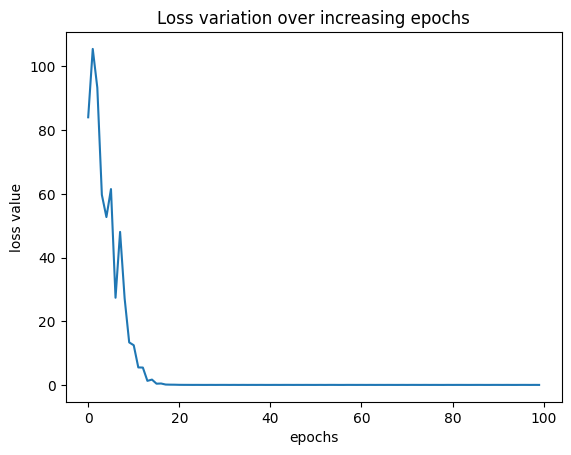

In [47]:
#Plotting Losses over epochs
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [48]:
#Prediction
val_x = [[10, 11]]
val_x = torch.tensor(val_x, dtype=torch.float32)
val_x = val_x.to(device)
pred = model(val_x)
pred

tensor([[21.1685]], grad_fn=<AddmmBackward0>)

In [49]:
#Implementing a custom loss function
def my_mse (_y, y):
  loss = (_y -y)**2
  loss = loss.mean()
  return loss

In [50]:
#Comparing losses
loss_func = nn.MSELoss()
loss1 = loss_func(model(X), Y)

loss2 = my_mse(model(X), Y)
print(loss1, loss2)

tensor(0.0069, grad_fn=<MseLossBackward0>) tensor(0.0069, grad_fn=<MeanBackward0>)


In [51]:
#Fetching the values of intermediate layers
input_to_hidden = model.input_to_hidden_layer(X)
input_to_hidden

tensor([[-0.7660, -0.9425, -0.2005, -1.2505,  2.3944, -0.6266, -0.4524,  1.1561],
        [-1.9302, -1.8765, -0.7658, -2.9575,  5.1702, -1.8078, -1.0099,  3.5269],
        [-3.0944, -2.8105, -1.3312, -4.6646,  7.9461, -2.9889, -1.5674,  5.8977],
        [-4.2586, -3.7446, -1.8965, -6.3716, 10.7219, -4.1701, -2.1249,  8.2685]],
       grad_fn=<AddmmBackward0>)

In [52]:
input_to_hidden.shape

torch.Size([4, 8])

In [25]:
#Specifying the layers that we want to look at in the forward method.
class NeuralNet2(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer = nn.Linear(2,8)
    self.hidden_layer_activation = nn.ReLU()
    self.hidden_to_output_layer = nn.Linear(8,1)
  def forward(self, x):
    hidden1 = self.input_to_hidden_layer(x)
    hidden2 = self.hidden_layer_activation(hidden1)
    output = self.hidden_to_output_layer(hidden2)
    return output, hidden2

In [26]:
#Accessing the hidden layer output
mynet = NeuralNet2().to(device)
mynet(X)[1]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0847],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.6946, 0.0000, 0.0000, 0.3816],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.5391, 0.0000, 0.0000, 0.6785],
        [0.0000, 0.0000, 0.0000, 0.0000, 2.3835, 0.0000, 0.0000, 0.9754]],
       grad_fn=<ReluBackward0>)

In [27]:
#Using a sequential method to build a neural network
model1 = nn.Sequential(
nn.Linear(2, 8),
nn.ReLU(),
nn.Linear(8, 1)
).to(device)

In [53]:
#Print a summary of the model
!pip install torch_summary
from torchsummary import summary

summary(model, torch.zeros(1,2))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [54]:
#Predict values on a validation dataset
val = [[8,9],[10,11],[1.5,2.5]]
model(torch.tensor(val).float().to(device))

tensor([[17.1008],
        [21.1685],
        [ 3.8810]], grad_fn=<AddmmBackward0>)

In [30]:
#Saving and loading a PyTorch model
"""The dictionary in model.state_dict() corresponds to the parameter names (keys) and
the values (weight and bias values) corresponding to the model"""
model.state_dict()

OrderedDict([('input_to_hidden_layer.weight',
              tensor([[ 0.1228,  0.5464],
                      [ 0.5414,  0.5646],
                      [-0.2064,  0.1973],
                      [-0.0534, -0.0882],
                      [-0.4383,  0.2062],
                      [ 0.4646,  0.8289],
                      [-0.0847, -0.1005],
                      [ 0.6003, -0.5947]])),
             ('input_to_hidden_layer.bias',
              tensor([ 0.2737,  0.5119,  0.6613, -0.5854,  0.3223, -0.4393, -0.1520,  0.3064])),
             ('hidden_to_output_layer.weight',
              tensor([[ 0.2913,  0.6245,  0.0629,  0.3048,  0.0306,  0.8273, -0.2856, -0.1747]])),
             ('hidden_to_output_layer.bias', tensor([-0.0479]))])

In [55]:
#saving
"""A good practice is to transfer the model to
the CPU before calling torch.save, as this will save tensors as CPU tensors and not as CUDA tensors.
This will help in loading the model onto any machine, whether it contains CUDA capabilities or not."""
torch.save(model.to('cpu').state_dict(), 'mymodel.pth')

In [60]:
#Loading
model2 = MyNeuralNet().to(device)

state_dict = torch.load('mymodel.pth')

In [61]:
#Loading ...
model2.load_state_dict(state_dict)
# <All keys matched successfully>
model2.to(device)
model2(torch.tensor(val).float().to(device))

tensor([[17.1008],
        [21.1685],
        [ 3.8810]], grad_fn=<AddmmBackward0>)